In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [5]:
df.shape

(8425, 23)

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

### Extracting Date,Month and Year from Date column


In [8]:
df['Date']=pd.to_datetime(df['Date'])

In [9]:
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [10]:
df.drop(columns=['Date'],inplace=True)

In [11]:
df.duplicated().sum() 

1663

In [12]:
df = df.drop_duplicates()

In [14]:
df.isin([' ','NA','-']).sum().any()  ##checking for any whitespace, 'NA' or '-' exist in dataset.

False

### Checking Null Values

Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
Day                 0
Month               0
Year                0
dtype: int64


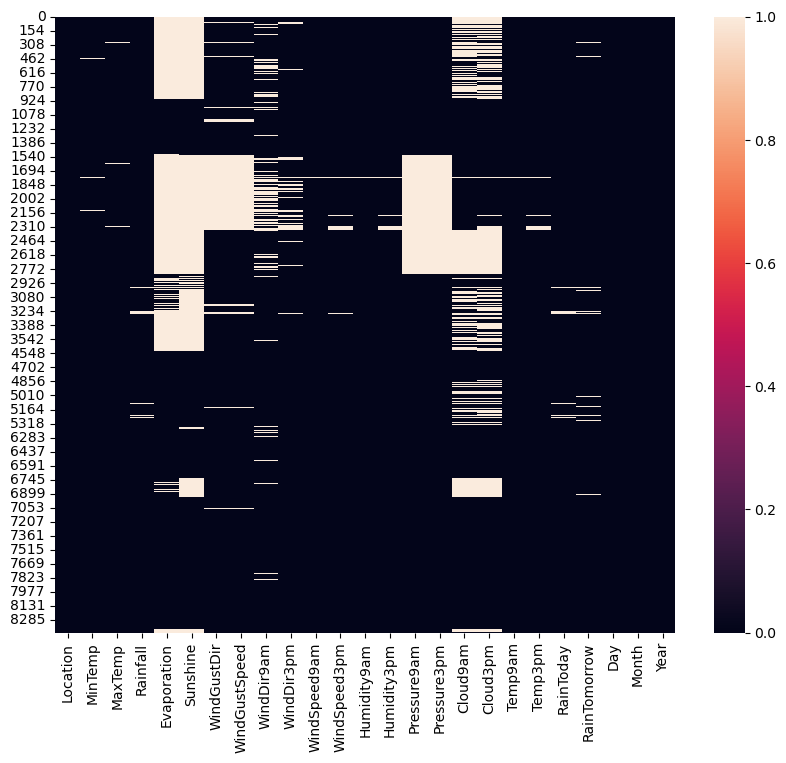

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isna())
print(df.isnull().sum())

In [16]:
Null_percentage=(df.isnull().mean()*100).round(2)
Null_percentage.sort_values(ascending=False).apply(lambda x: f"{x}%")

Sunshine         47.86%
Evaporation       43.2%
Cloud3pm         28.13%
Cloud9am          27.6%
Pressure3pm      19.39%
Pressure9am      19.34%
WindGustDir      13.93%
WindGustSpeed    13.93%
WindDir9am       11.74%
WindDir3pm        4.35%
RainTomorrow      2.04%
RainToday         2.04%
Rainfall          2.04%
WindSpeed3pm      1.48%
Humidity3pm       1.42%
Temp3pm           1.36%
MinTemp           1.04%
WindSpeed9am      0.93%
MaxTemp           0.84%
Humidity9am        0.8%
Temp9am           0.75%
Month              0.0%
Location           0.0%
Day                0.0%
Year               0.0%
dtype: object

### Handling Null Values

In [17]:
#filling (WindGustDir,WindDir9am,WindSpeed9am) column With Mode of the column.
df['WindGustDir'].fillna(value=df['WindGustDir'].mode()[0], inplace= True)
df['WindDir9am'].fillna(value=df['WindDir9am'].mode()[0], inplace= True)
df['WindDir3pm'].fillna(value=df['WindDir3pm'].mode()[0], inplace= True)
df['RainToday'].fillna(value=df['RainToday'].mode()[0], inplace= True)
df['RainTomorrow'].fillna(value=df['RainTomorrow'].mode()[0], inplace= True)

In [18]:
#filling null column with mean value of column.
df['Sunshine'].fillna(value=df['Sunshine'].mean(), inplace= True)
df['Evaporation'].fillna(value=df['Evaporation'].mean(), inplace= True)
df['Cloud9am'].fillna(value=df['Cloud9am'].mean(), inplace= True)
df['Cloud3pm'].fillna(value=df['Cloud3pm'].mean(), inplace= True)
df['Pressure9am'].fillna(value=df['Pressure9am'].mean(), inplace= True)
df['Pressure3pm'].fillna(value=df['Pressure3pm'].mean(), inplace= True)
df['WindGustSpeed'].fillna(value=df['WindGustSpeed'].mean(), inplace= True)
df['Rainfall'].fillna(value=df['Rainfall'].mean(), inplace= True)
df['WindSpeed9am'].fillna(value=df['WindSpeed9am'].mean(), inplace= True)
df['WindSpeed3pm'].fillna(value=df['WindSpeed3pm'].mean(), inplace= True)
df['Humidity9am'].fillna(value=df['Humidity9am'].mean(), inplace= True)
df['Humidity3pm'].fillna(value=df['Humidity3pm'].mean(), inplace= True)
df['Pressure9am'].fillna(value=df['Pressure9am'].mean(), inplace= True)
df['Pressure3pm'].fillna(value=df['Pressure3pm'].mean(), inplace= True)
df['Cloud9am'].fillna(value=df['Cloud9am'].mean(), inplace= True)
df['Cloud3pm'].fillna(value=df['Cloud3pm'].mean(), inplace= True)
df['Temp9am'].fillna(value=df['Temp9am'].mean(), inplace= True)
df['Temp3pm'].fillna(value=df['Temp3pm'].mean(), inplace= True)
df['MinTemp'].fillna(value=df['MinTemp'].mean(), inplace= True)
df['MaxTemp'].fillna(value=df['MaxTemp'].mean(), inplace= True)

In [19]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

In [20]:
df.shape

(6762, 25)

## Exploratory Data Analysis

### 1. Univariate Analysis

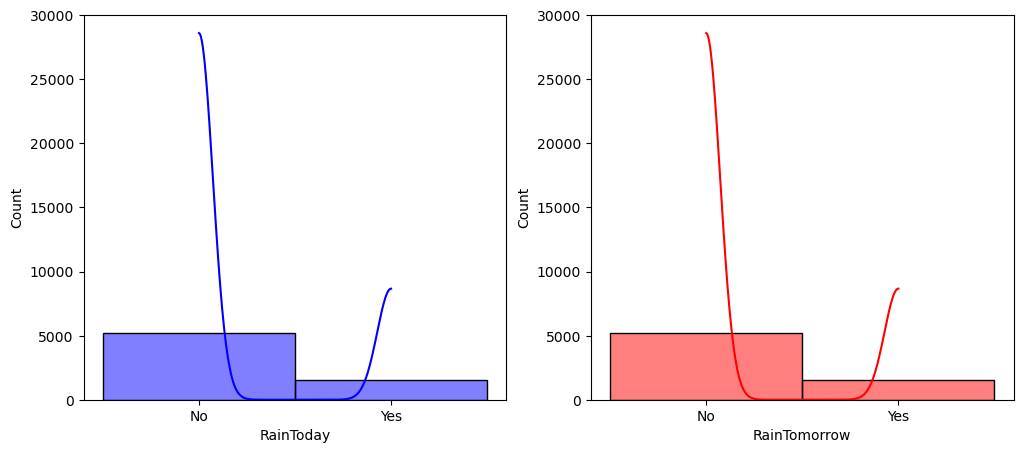

In [21]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['RainToday'],kde=True,color='b')
plt.subplot(1,2,2)
sns.histplot(df['RainTomorrow'],kde=True,color='r')
plt.show()

In [22]:
df['Location'].value_counts() 


Location
PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: count, dtype: int64

In [23]:
df['WindDir9am'].value_counts() 

WindDir9am
N      1403
SW      590
NW      463
SE      439
ENE     397
WSW     394
SSW     368
NE      364
E       338
NNE     337
S       324
WNW     301
SSE     300
W       299
ESE     229
NNW     216
Name: count, dtype: int64

In [24]:
df['WindDir3pm'].value_counts() 

WindDir3pm
SE     971
WSW    499
S      493
NE     480
SW     428
SSE    421
NW     400
W      399
E      392
WNW    389
ESE    363
N      354
ENE    348
NNE    305
SSW    277
NNW    243
Name: count, dtype: int64

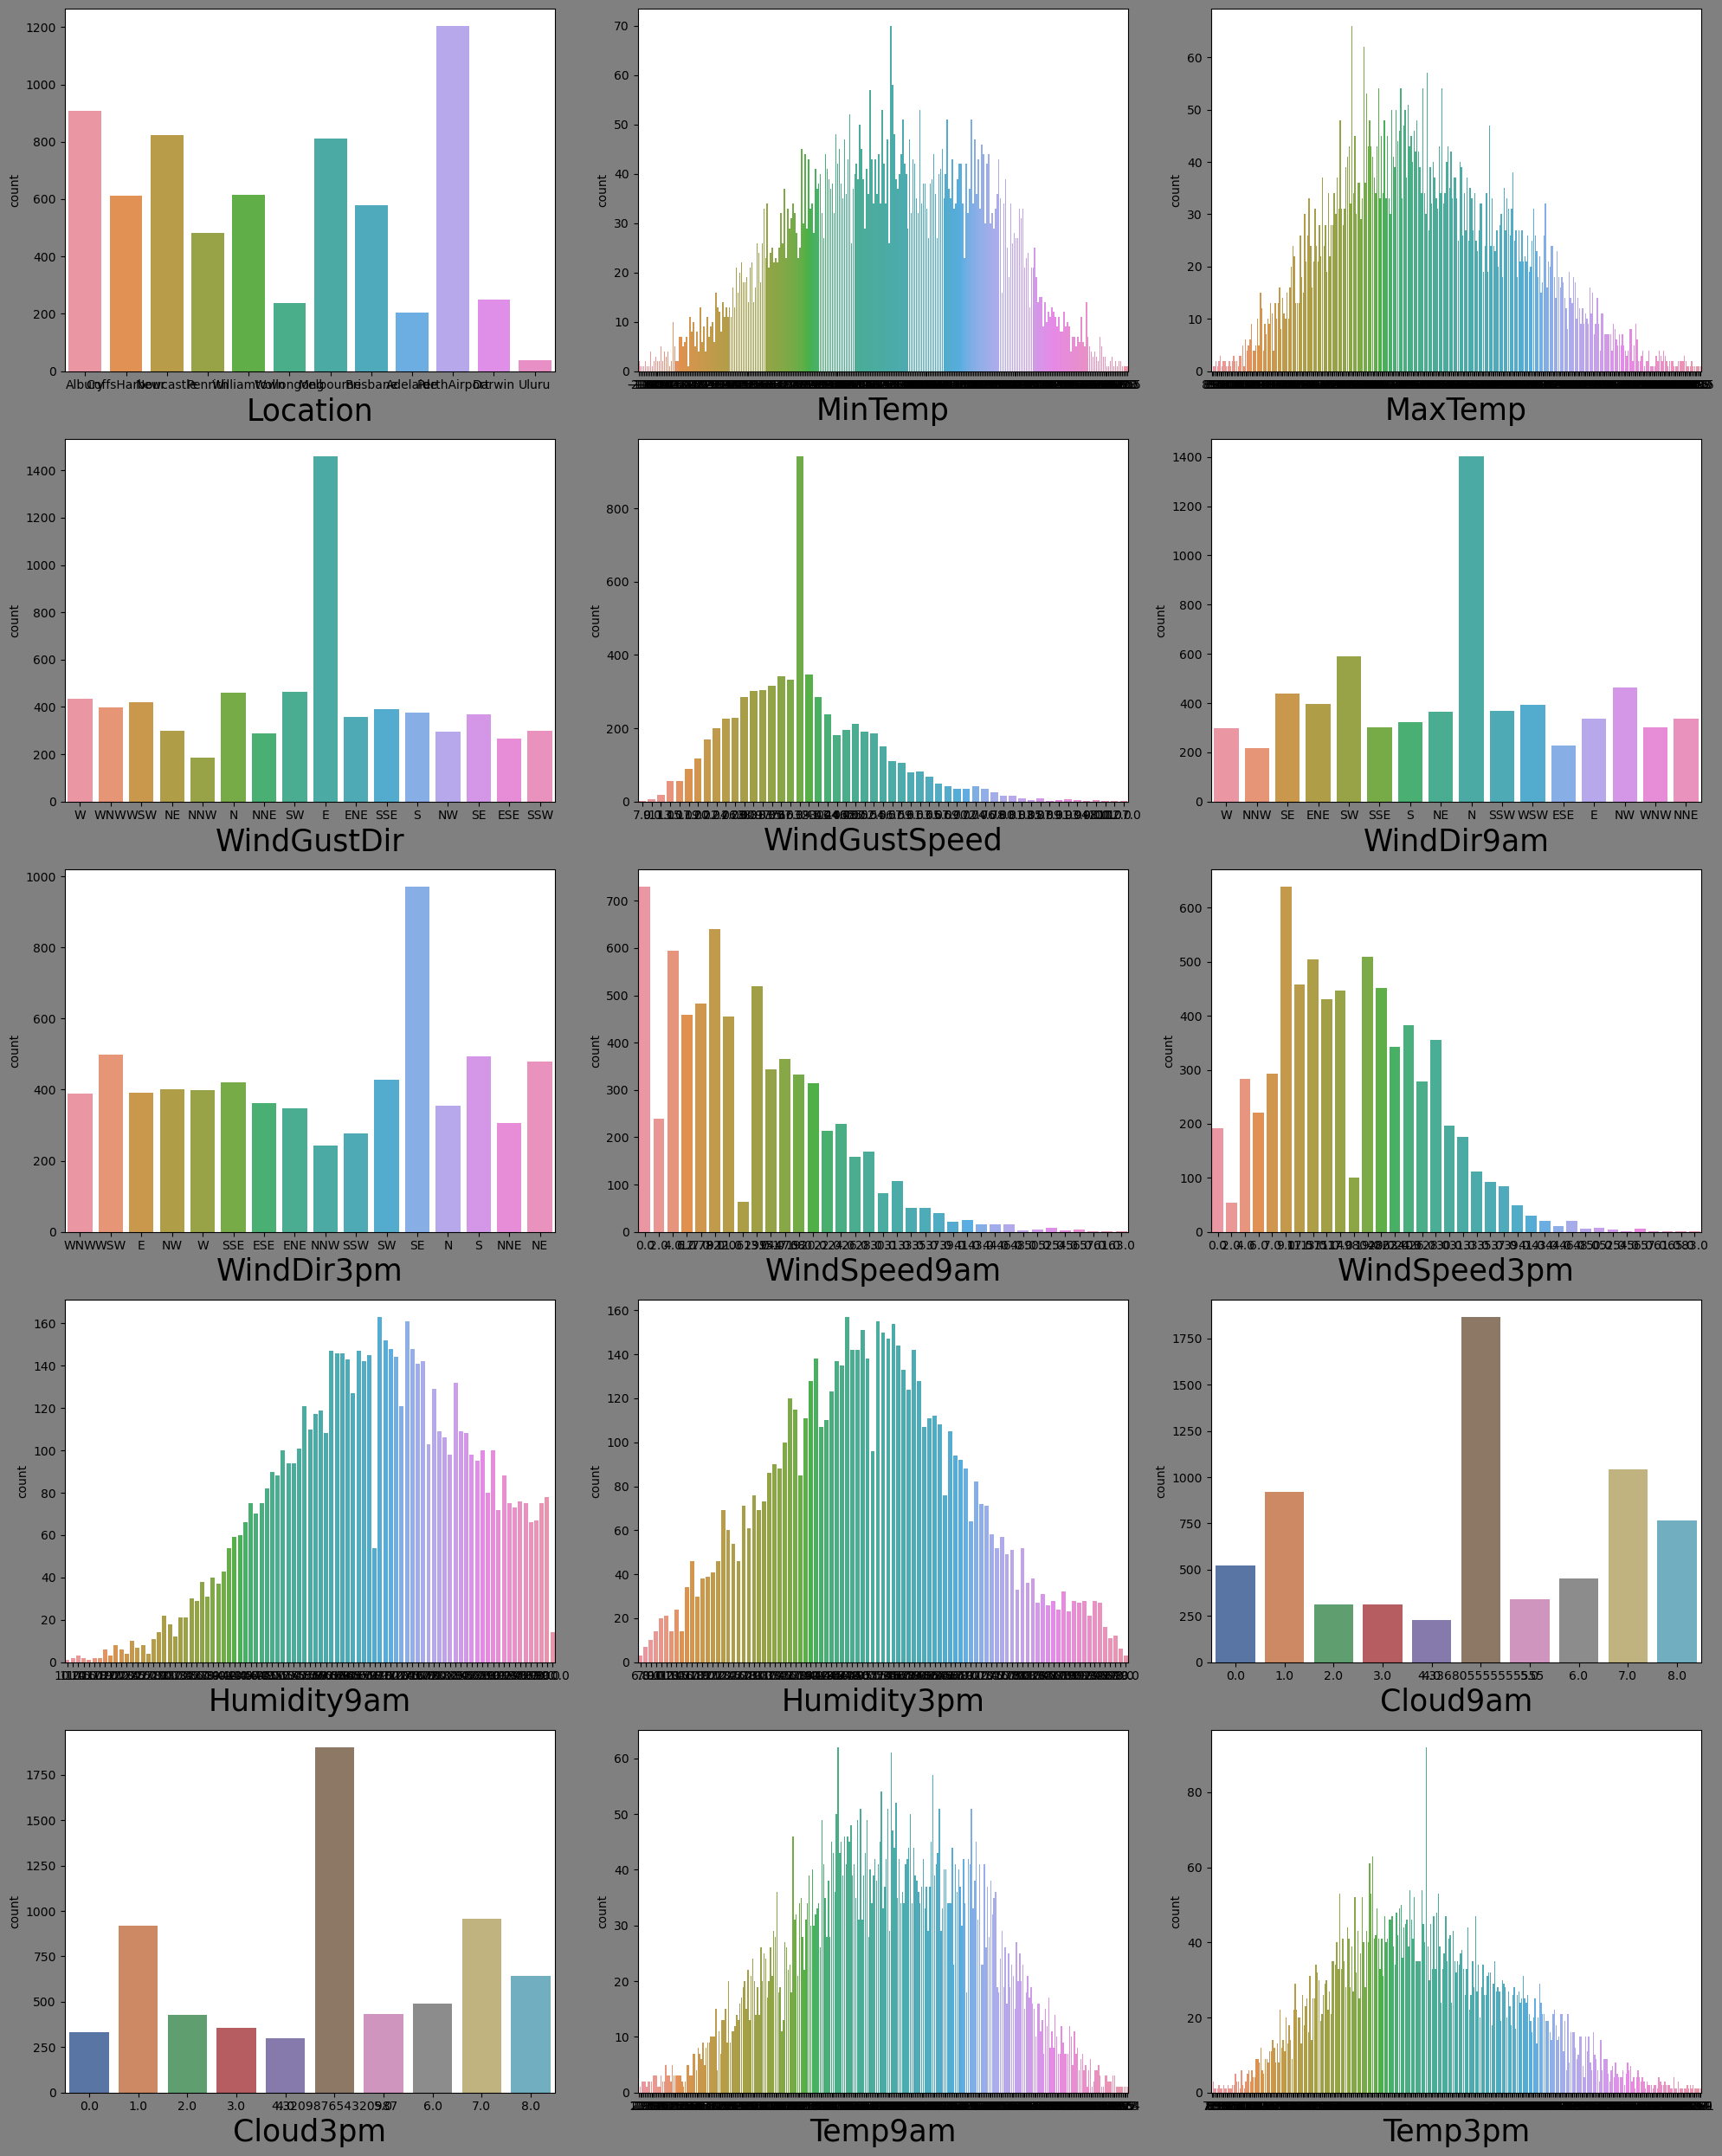

In [25]:
sns.set_palette('deep')
plt.figure(figsize=(20,25), facecolor='grey')

categories =['Location', 'MinTemp', 'MaxTemp',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
        'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']

for i, category in enumerate(categories, 1):
    plt.subplot(5, 3, i)
    sns.countplot(data=df, x=category)
    plt.xlabel(category, fontsize=25)

plt.tight_layout()
plt.show()

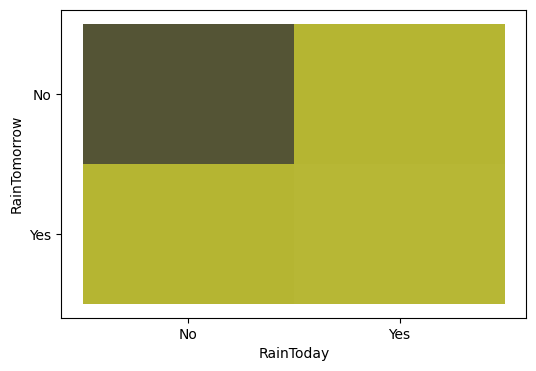

In [26]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='RainToday', y='RainTomorrow',color='y')
plt.show()

### 2. Bivariate Analysis

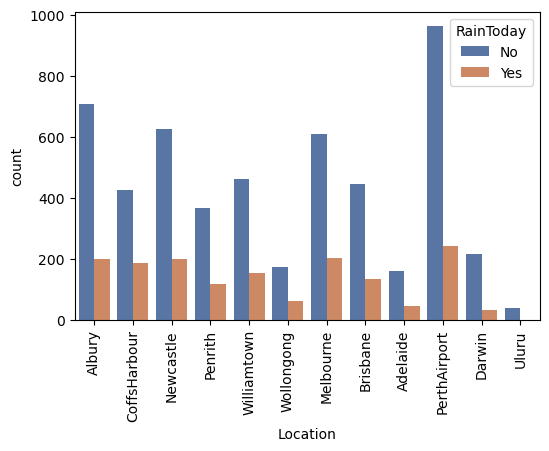

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Location', hue='RainToday')
plt.xticks(fontsize=10,rotation=90)
plt.show()


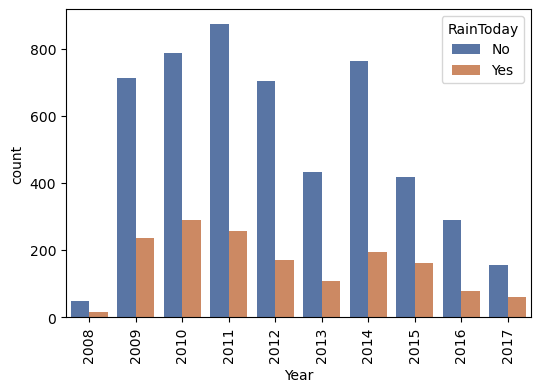

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Year', hue='RainToday')
plt.xticks(fontsize=10,rotation=90)
plt.show()

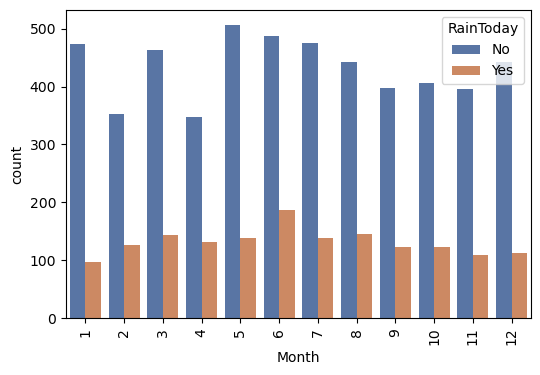

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Month', hue='RainToday')
plt.xticks(fontsize=10,rotation=90)
plt.show()

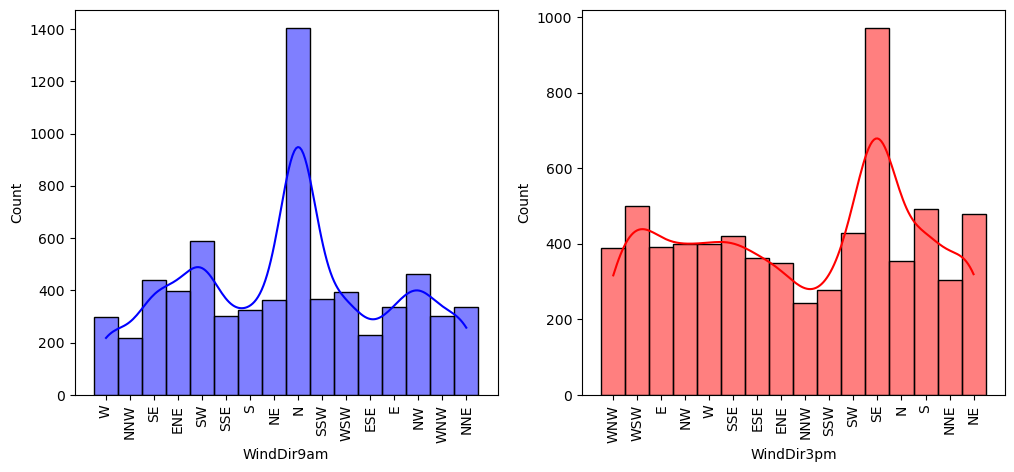

In [30]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['WindDir9am'],kde=True,color='b')
plt.xticks(fontsize=10,rotation=90)
plt.subplot(1,2,2)
sns.histplot(df['WindDir3pm'],kde=True,color='r')
plt.xticks(fontsize=10,rotation=90)

plt.show()

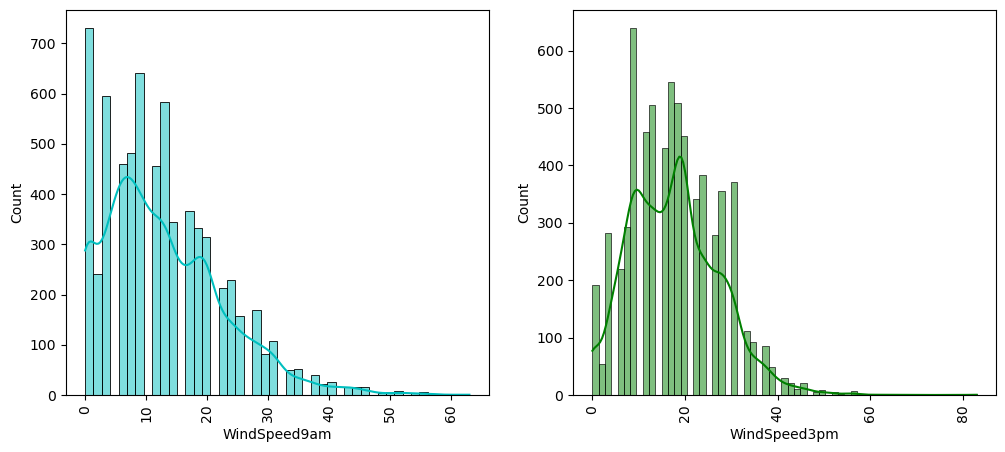

In [31]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['WindSpeed9am'],kde=True,color='c')
plt.xticks(fontsize=10,rotation=90)

plt.subplot(1,2,2)
sns.histplot(df['WindSpeed3pm'],kde=True,color='g')
plt.xticks(fontsize=10,rotation=90)

plt.show()

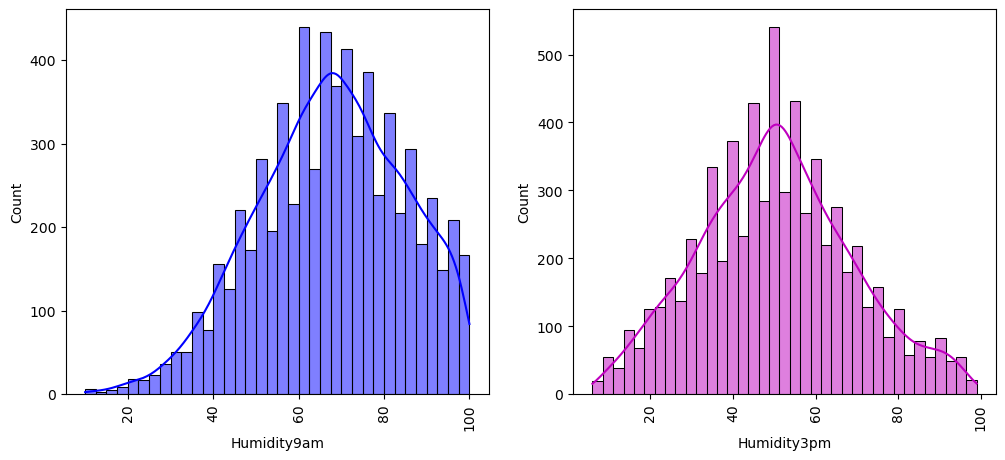

In [32]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Humidity9am'],kde=True,color='b')
plt.xticks(fontsize=10,rotation=90)

plt.subplot(1,2,2)
sns.histplot(df['Humidity3pm'],kde=True,color='m')
plt.xticks(fontsize=10,rotation=90)

plt.show()

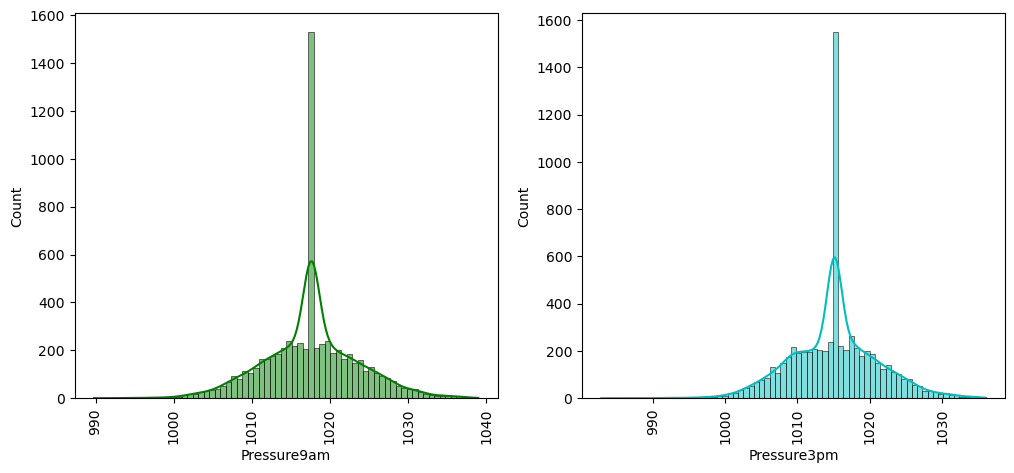

In [33]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Pressure9am'],kde=True,color='g')
plt.xticks(fontsize=10,rotation=90)

plt.subplot(1,2,2)
sns.histplot(df['Pressure3pm'],kde=True,color='c')
plt.xticks(fontsize=10,rotation=90)

plt.show()


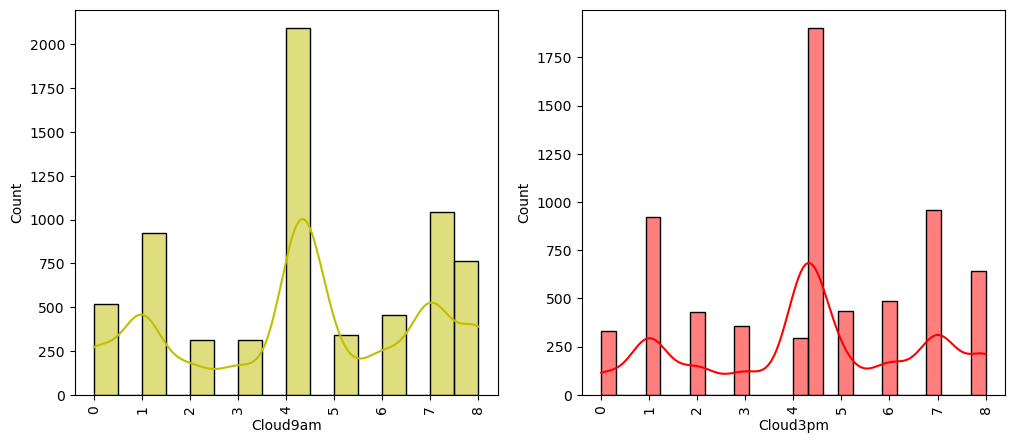

In [34]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Cloud9am'],kde=True,color='y')
plt.xticks(fontsize=10,rotation=90)

plt.subplot(1,2,2)
sns.histplot(df['Cloud3pm'],kde=True,color='r')
plt.xticks(fontsize=10,rotation=90)

plt.show()

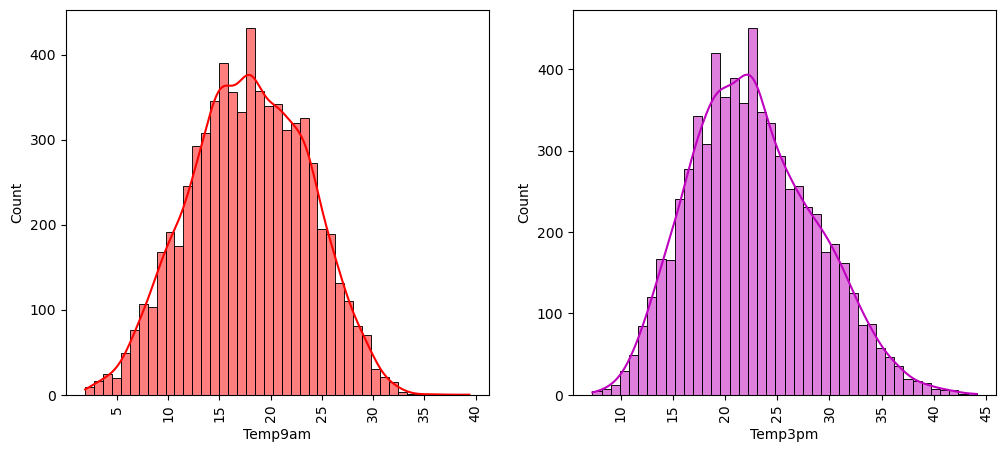

In [36]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Temp9am'],kde=True,color='r')
plt.xticks(fontsize=10,rotation=90)
plt.subplot(1,2,2)
sns.histplot(df['Temp3pm'],kde=True,color='m')
plt.xticks(fontsize=10,rotation=90)

plt.show()

### Encoding Categorical Value to Numerical Value

In [37]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Location','WindGustDir','WindDir9am','WindDir3pm']
label_encoder = LabelEncoder()

for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

## Statistical Analysis

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Location,6762.0,5.323721,3.099455,0.0,2.250000,6.000000,8.000000,11.0
MinTemp,6762.0,13.109145,5.540667,-2.0,9.000000,13.109145,17.400000,28.5
MaxTemp,6762.0,24.098345,6.130123,8.2,19.600000,23.500000,28.400000,45.5
Rainfall,6762.0,2.780148,10.482769,0.0,0.000000,0.000000,1.200000,371.0
Evaporation,6762.0,5.302395,3.343713,0.0,4.000000,5.302395,5.302395,145.0
Sunshine,6762.0,7.890896,2.733639,0.0,7.890896,7.890896,9.200000,13.9
WindGustDir,6762.0,6.610470,5.233746,0.0,1.000000,7.000000,12.000000,15.0
WindGustSpeed,6762.0,38.977663,13.376457,7.0,30.000000,38.977663,46.000000,107.0
WindDir9am,6762.0,7.013310,4.550702,0.0,3.000000,7.000000,11.000000,15.0
WindDir3pm,6762.0,7.842798,4.486894,0.0,4.000000,9.000000,12.000000,15.0


## Outlier Detection

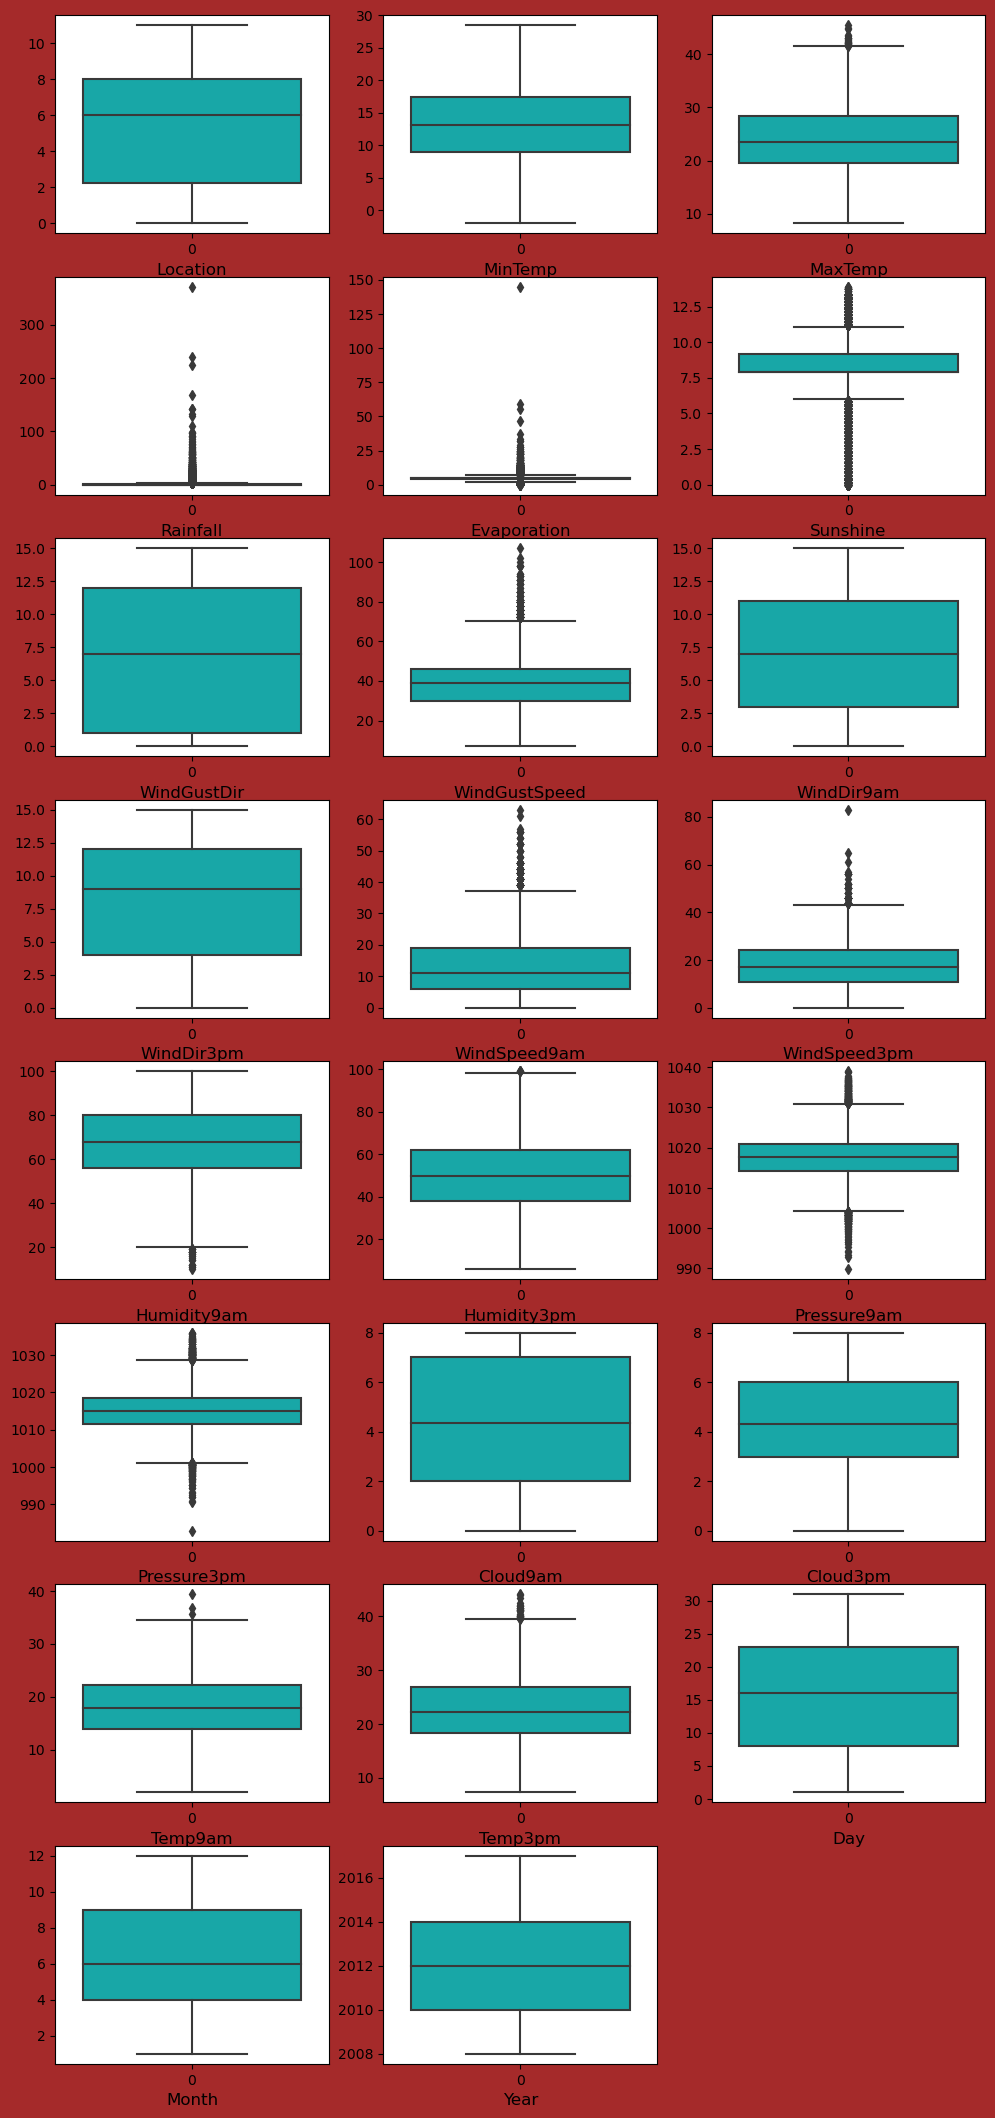

In [40]:
columns=['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'Day', 'Month', 'Year']
plt.figure(figsize=(12,30),facecolor='brown')
index=1
for column in columns:
    if index <=25:
        ax = plt.subplot(9,3,index)
        sns.boxplot(df[column], color='c')
        plt.xlabel(column,fontsize=12)
    index+=1
plt.show()

### Removing Outliers

In [41]:
from scipy.stats import zscore

# Specify the columns to remove outliers
columns_to_remove_outliers = [ 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
                              'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm',
                              'Temp9am', 'Temp3pm']

# Calculate z-scores for each specified column
z_scores = df[columns_to_remove_outliers].apply(zscore)

# Set a threshold for z-scores ( 3)
threshold = 3

# Remove rows with z-scores beyond the threshold in any specified column
df1 = df[(z_scores.abs() < threshold).all(axis=1)]

## Data Skewness

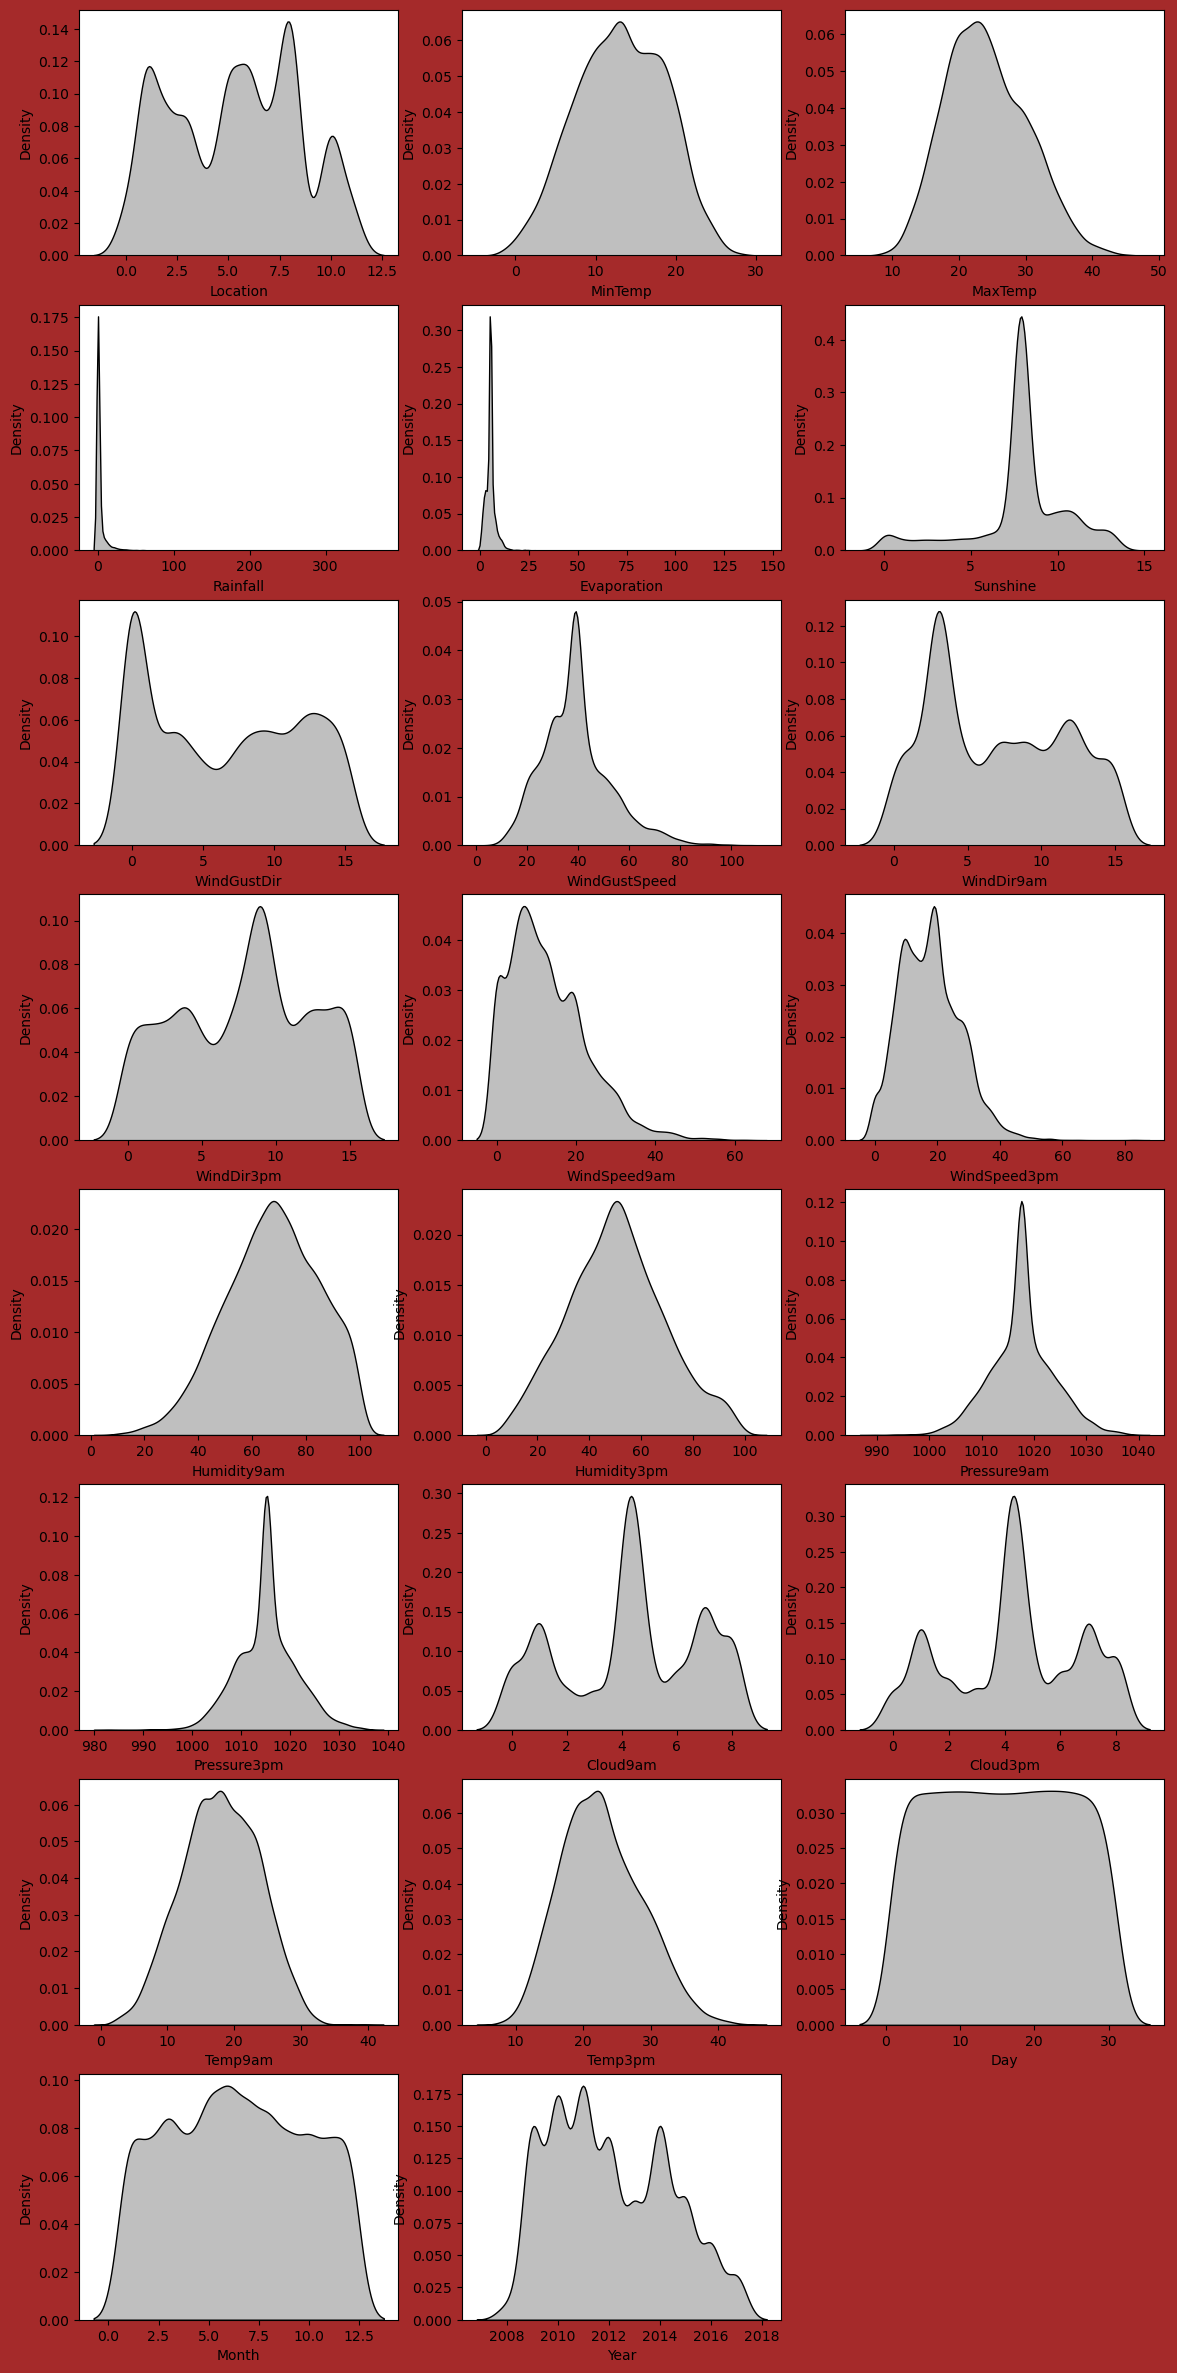

In [42]:
plt.figure(figsize=(14,30), facecolor='brown')
plotnumber=1
for column in columns:
    if plotnumber <=23:
        ax = plt.subplot(8,3,plotnumber)
        sns.distplot(df[column], color='k',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [44]:
df.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of       Location  MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
0            1     13.4  22.900000       0.6     5.302395  7.890896   
1            1      7.4  25.100000       0.0     5.302395  7.890896   
2            1     12.9  25.700000       0.0     5.302395  7.890896   
3            1      9.2  28.000000       0.0     5.302395  7.890896   
4            1     17.5  32.300000       1.0     5.302395  7.890896   
...        ...      ...        ...       ...          ...       ...   
8420         9      2.8  23.400000       0.0     5.302395  7.890896   
8421         9      3.6  25.300000       0.0     5.302395  7.890896   
8422         9      5.4  26.900000       0.0     5.302395  7.890896   
8423         9      7.8  27.000000       0.0     5.302395  7.890896   
8424         9     14.9  24.098345       0.0     5.302395  7.890896   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  \
0     

### Treating Skewness

In [45]:
# columns with right-skewed data containing zeros
right_skewed =  ['Rainfall','Evaporation','WindSpeed9am']

from sklearn.preprocessing import PowerTransformer
scale = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df[right_skewed] = scale.fit_transform(df[right_skewed].values)

In [46]:
df.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of       Location  MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
0            1     13.4  22.900000  0.592756      0.17104  7.890896   
1            1      7.4  25.100000 -0.681888      0.17104  7.890896   
2            1     12.9  25.700000 -0.681888      0.17104  7.890896   
3            1      9.2  28.000000 -0.681888      0.17104  7.890896   
4            1     17.5  32.300000  0.950465      0.17104  7.890896   
...        ...      ...        ...       ...          ...       ...   
8420         9      2.8  23.400000 -0.681888      0.17104  7.890896   
8421         9      3.6  25.300000 -0.681888      0.17104  7.890896   
8422         9      5.4  26.900000 -0.681888      0.17104  7.890896   
8423         9      7.8  27.000000 -0.681888      0.17104  7.890896   
8424         9     14.9  24.098345 -0.681888      0.17104  7.890896   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  \
0     

### Dataset Split

In [47]:
feature=['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'Day', 'Month', 'Year']
target1=['RainToday']
target2=['RainTomorrow']

In [48]:
X=df[feature]
Y=df[target1]
y=df[target2]

## Feature Scaling

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

## Variance Inflation Factor

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif['Features'] = X.columns
vif

,VIF,Features
0,1.632557,Location
1,9.061999,MinTemp
2,26.585445,MaxTemp
3,1.548552,Rainfall
4,1.516884,Evaporation
5,1.980939,Sunshine
6,1.554652,WindGustDir
7,2.248005,WindGustSpeed
8,1.337704,WindDir9am
9,1.422771,WindDir3pm


### ML Model

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.metrics import  r2_score
# Spliting the data for training & testing.
for i in range(1,250):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=i, test_size=.2)
    
X_train.shape

(5409, 23)

### Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train,Y_train)
    Y_pred=lr.predict(X_test)
    acc=accuracy_score(Y_test,Y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu*100 ,'on Random_state', maxRS)

Best accuracy is 97.78270509977827 on Random_state 78


In [53]:
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, Y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, Y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, Y_pred))


Accuracy Score of Logistics Regression : 0.9711751662971175


Confusion matrix of Logistics Regression : 
 [[998  27]
 [ 12 316]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

          No       0.99      0.97      0.98      1025
         Yes       0.92      0.96      0.94       328

    accuracy                           0.97      1353
   macro avg       0.95      0.97      0.96      1353
weighted avg       0.97      0.97      0.97      1353



## Model Classification

In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
models = [SVC(), GaussianNB(), DecisionTreeClassifier(), 
          KNeighborsClassifier(n_neighbors=3), RandomForestClassifier(), ExtraTreesClassifier()]

for model in models:
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print('\033[1m' + 'Classification ML Algorithm Evaluation Matrix for', model.__class__.__name__ + ':' + '\033[0m')
    print('\n')
    print('\033[1m' + 'Accuracy Score :' + '\033[0m\n', accuracy_score(Y_test, Y_pred))
    print('\n')
    print('\033[1m' + 'Confusion matrix :' + '\033[0m \n', confusion_matrix(Y_test, Y_pred))
    print('\n')
    print('\033[1m' + 'Classification Report :' + '\033[0m \n', classification_report(Y_test, Y_pred))
    print('\n')
    
    print('='*100)

Classification ML Algorithm Evaluation Matrix for SVC:


Accuracy Score :
 0.9719142645971914


Confusion matrix : 
 [[994  31]
 [  7 321]]


Classification Report : 
               precision    recall  f1-score   support

          No       0.99      0.97      0.98      1025
         Yes       0.91      0.98      0.94       328

    accuracy                           0.97      1353
   macro avg       0.95      0.97      0.96      1353
weighted avg       0.97      0.97      0.97      1353



Classification ML Algorithm Evaluation Matrix for GaussianNB:


Accuracy Score :
 0.967479674796748


Confusion matrix : 
 [[986  39]
 [  5 323]]


Classification Report : 
               precision    recall  f1-score   support

          No       0.99      0.96      0.98      1025
         Yes       0.89      0.98      0.94       328

    accuracy                           0.97      1353
   macro avg       0.94      0.97      0.96      1353
weighted avg       0.97      0.97      0.97      1353





AttributeError: 'Flags' object has no attribute 'c_contiguous'

### Hyperparameter Tuning

In [55]:
from sklearn.model_selection import GridSearchCV
parameter={'n_estimators':[200,400],'max_depth':[2,3],'min_samples_leaf':[1,2],'min_samples_split':[2,2.5],
         'criterion':['gini']}
grid_search = GridSearchCV(RandomForestClassifier(),parameter, cv=5, scoring='accuracy',verbose=5)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.882 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.896 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.905 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.880 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.859 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=0.884 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=0.890 total time=   0.5s
[CV 3/5]

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 2.5],
                         'n_estimators': [200, 400]},
             scoring='accuracy', verbose=5)

In [56]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [57]:
model=RandomForestClassifier(criterion = 'gini', max_depth = 3, min_samples_leaf = 2, min_samples_split = 2, n_estimators = 200)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
print('\033[1m'+'RandomForestClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of RandomForestClassifier :'+'\033[0m', accuracy_score(Y_test, pred))
print('\n')
print('\033[1m'+'Confusion matrix ofRandomForestClassifier :'+'\033[0m \n',confusion_matrix(Y_test, pred))
print('\n')
print('\033[1m'+'classification Report of RandomForestClassifier '+'\033[0m \n',classification_report(Y_test, pred))


RandomForestClassifier Evaluation


Accuracy Score of RandomForestClassifier : 0.9637841832963784


Confusion matrix ofRandomForestClassifier : 
 [[1014   11]
 [  38  290]]


classification Report of RandomForestClassifier  
               precision    recall  f1-score   support

          No       0.96      0.99      0.98      1025
         Yes       0.96      0.88      0.92       328

    accuracy                           0.96      1353
   macro avg       0.96      0.94      0.95      1353
weighted avg       0.96      0.96      0.96      1353



In [58]:
Y_test

,RainToday
6781,No
7587,No
3524,No
110,No
3084,Yes
...,...
757,No
5257,No
8093,No
3282,No


## Model Saving

In [62]:
import joblib
joblib.dump(model,'Rainfall_Weather_Forecasting.pkl')

['Rainfall_Weather_Forecasting.pkl']